In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ast

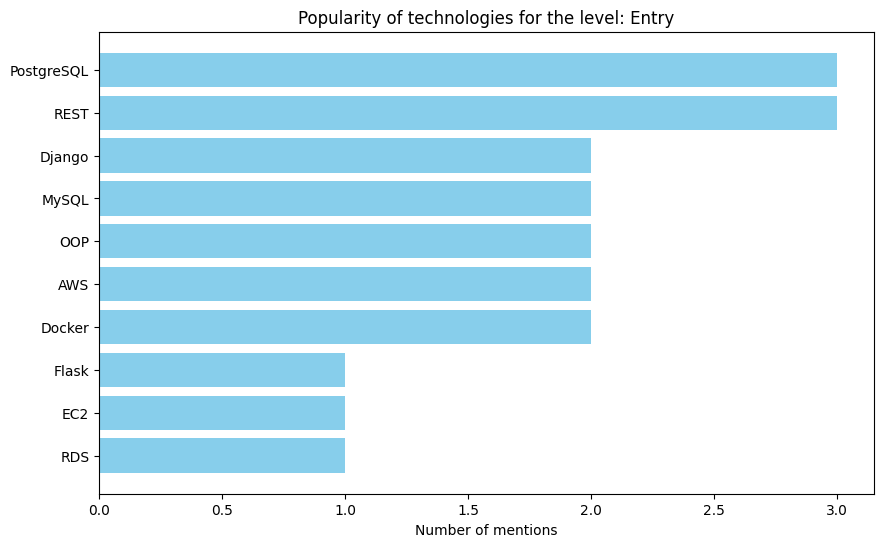

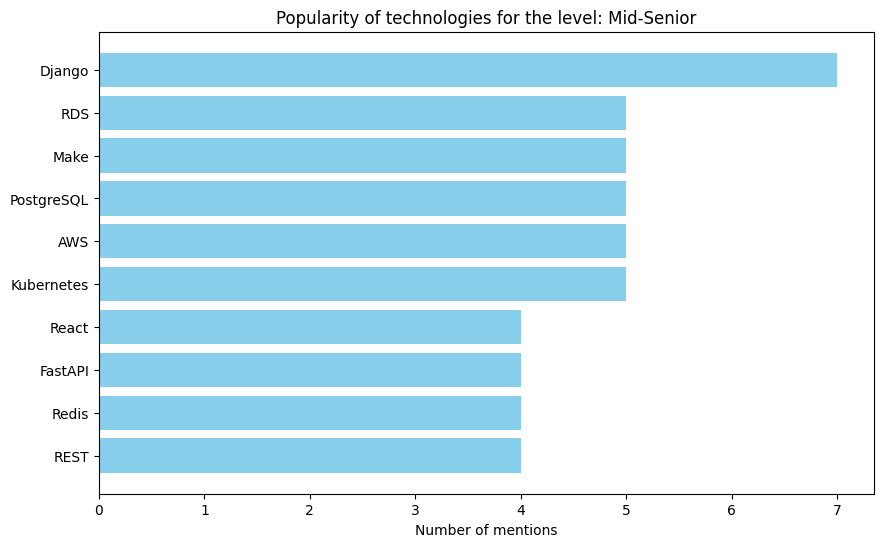

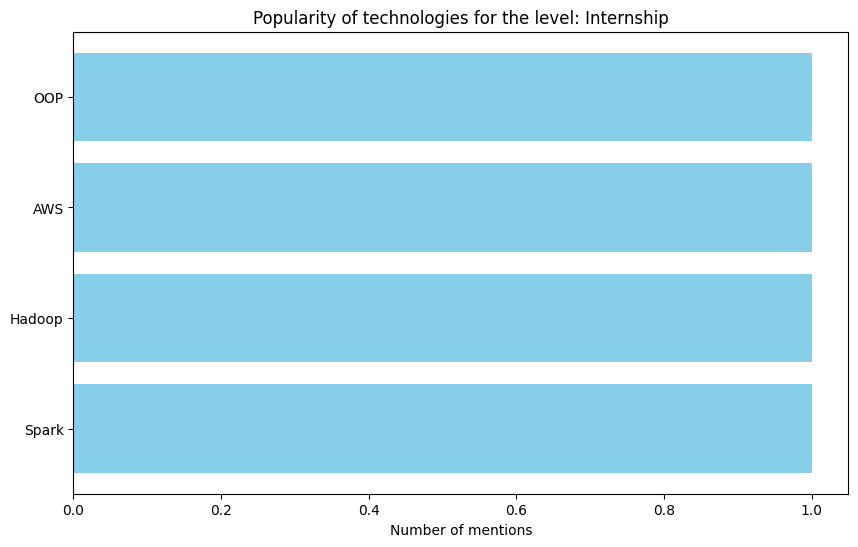

In [24]:
linked_df = pd.read_csv("C:/Users/user/PycharmProjects/scraping_data_project/data_analysis/linkedin.csv")

# Converting a string with technologies to a list
linked_df['Technologies'] = linked_df['Technologies'].apply(lambda x: ast.literal_eval(x.replace(';', ',')) if isinstance(x, str) and pd.notnull(x) else [])

# Function for analyzing the popularity of technologies
def analyze_technologies_by_seniority(df):
    # Dividing by levels
    seniority_levels = ['Entry', 'Mid-Senior', 'Internship', 'Full-time']
    
    for level in seniority_levels:
        # Filtering by levels
        df_level = df[df['Seniority_level'] == level]
        
        # Count all technologies in category
        tech_counter = Counter([tech for tech_list in df_level['Technologies'] for tech in tech_list])
        
        # Chart building
        if tech_counter:
            techs, counts = zip(*tech_counter.most_common(10))  # Top 10 most popular
            plt.figure(figsize=(10, 6))
            plt.barh(techs, counts, color='skyblue')
            plt.xlabel('Number of mentions')
            plt.title(f'Popularity of technologies for the level: {level}')
            plt.gca().invert_yaxis()
            plt.show()

analyze_technologies_by_seniority(linked_df)
linked_df.to_csv('analysed_csv/analyzed_vacancies_linked.csv', index=False)

%matplotlib inline